<a href="https://colab.research.google.com/github/Chaitanyachafle/Portfolio/blob/main/Aerofit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
df=pd.read_csv("/content/drive/MyDrive/aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
#Overview of Shape of data,datatype of all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
#Overview of statistical Summery of data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
#Total number of entries in data
df.count()

Product          180
Age              180
Gender           180
Education        180
MaritalStatus    180
Usage            180
Fitness          180
Income           180
Miles            180
dtype: int64

<Axes: >

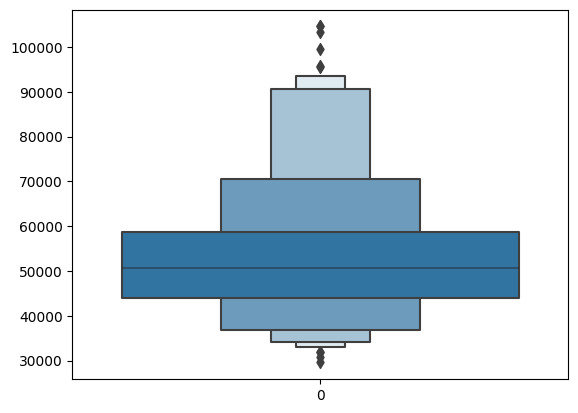

In [8]:
# Detect outlier in income using boxplot and IQR for Income
sns.boxenplot(data=df["Income"])




In [9]:
#calculated Q1,Q2,Q3 for income
income_25=np.percentile(df["Income"],25)
income_50=np.percentile(df["Income"],50)
income_75=np.percentile(df["Income"],75)
income_25,income_50,income_75

(44058.75, 50596.5, 58668.0)

In [10]:
#Calculated Inter Quattile range for Income
IQR_Income=income_75-income_25
IQR_Income


14609.25

In [11]:
#Caluclating Upper_whisker and Lower_Whisker for Income
upper_income=income_75 + 1.5 * IQR_Income
lower_income=income_25 - 1.5 * IQR_Income
upper_income,lower_income

(80581.875, 22144.875)

In [12]:
# Number of outlier in Income
outlier_income=df[df["Income"]>upper_income]
len(outlier_income)

19

<Axes: xlabel='Product', ylabel='count'>

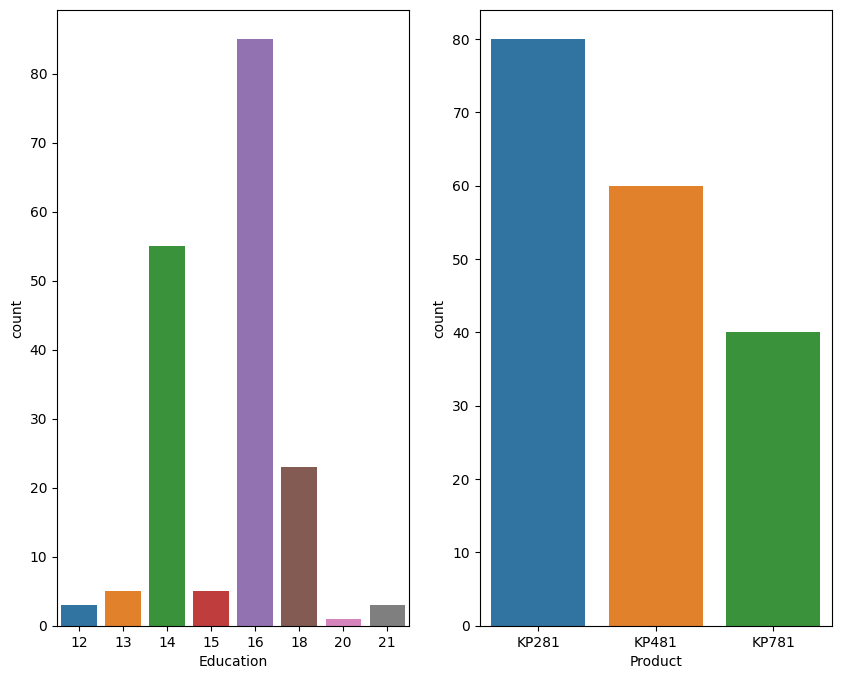

In [13]:
#Univarient visual analysis
fig = plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
sns.countplot(data=df,x="Education")
plt.subplot(1,2,2)
sns.countplot(data=df,x="Product")

Conclusion: Education 16 year used most of aerofit products

Conclusion: KP281 entry-level treadmill has higest number 80 sells

<Axes: xlabel='Education', ylabel='Age'>

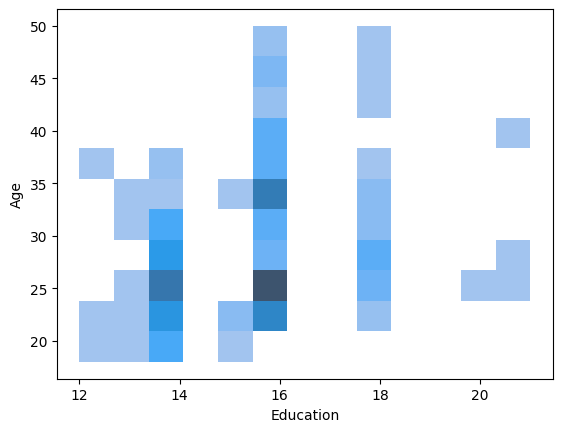

In [14]:
sns.histplot(data=df,x="Education",y="Age")

Conclusion:Out of Education 16year with Age group around 24-25 are the most prominent used group

<Axes: xlabel='Age', ylabel='Density'>

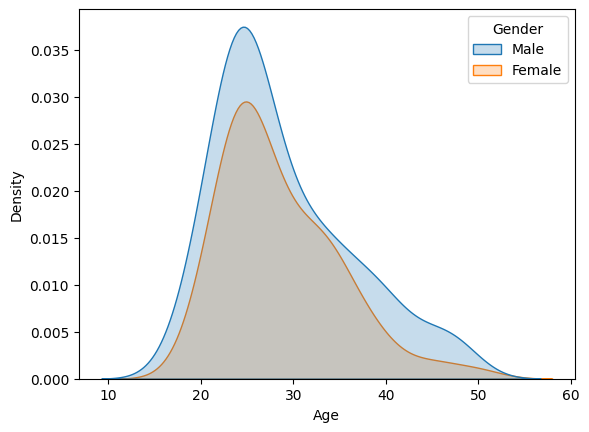

In [15]:
#Distribution of all customer across all age & gender
sns.kdeplot(data=df,x="Age",hue="Gender",fill=True)

In [16]:
df_numerical=df[["Age","Usage","Fitness","Income","Education"]]
df_numerical.corr()

,Age,Usage,Fitness,Income,Education
Age,1.000000,0.015064,0.061105,0.513414,0.280496
Usage,0.015064,1.000000,0.668606,0.519537,0.395155
Fitness,0.061105,0.668606,1.000000,0.535005,0.410581
Income,0.513414,0.519537,0.535005,1.000000,0.625827
Education,0.280496,0.395155,0.410581,0.625827,1.000000


<Axes: >

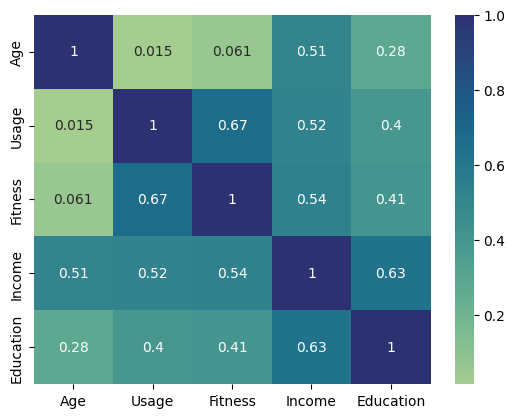

In [17]:
# Bivarient Visual Analysis
sns.heatmap(df_numerical.corr(),cmap="crest",annot=True)

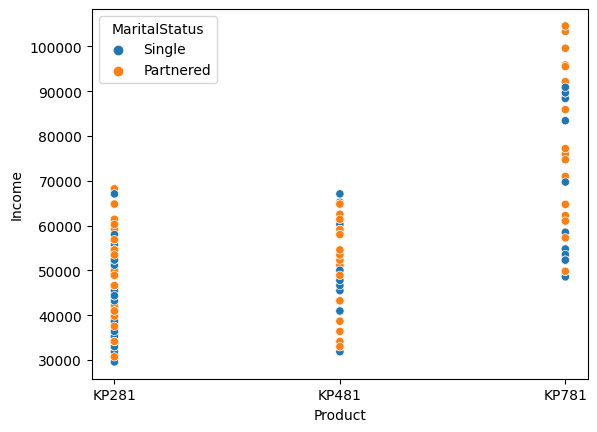

In [18]:
# Bivarient Visual Analysis
sns.scatterplot(x="Product",y="Income",hue="MaritalStatus",data=df)
plt.show()

Conclusion: KP781 is hightend module mostly used by higher income source

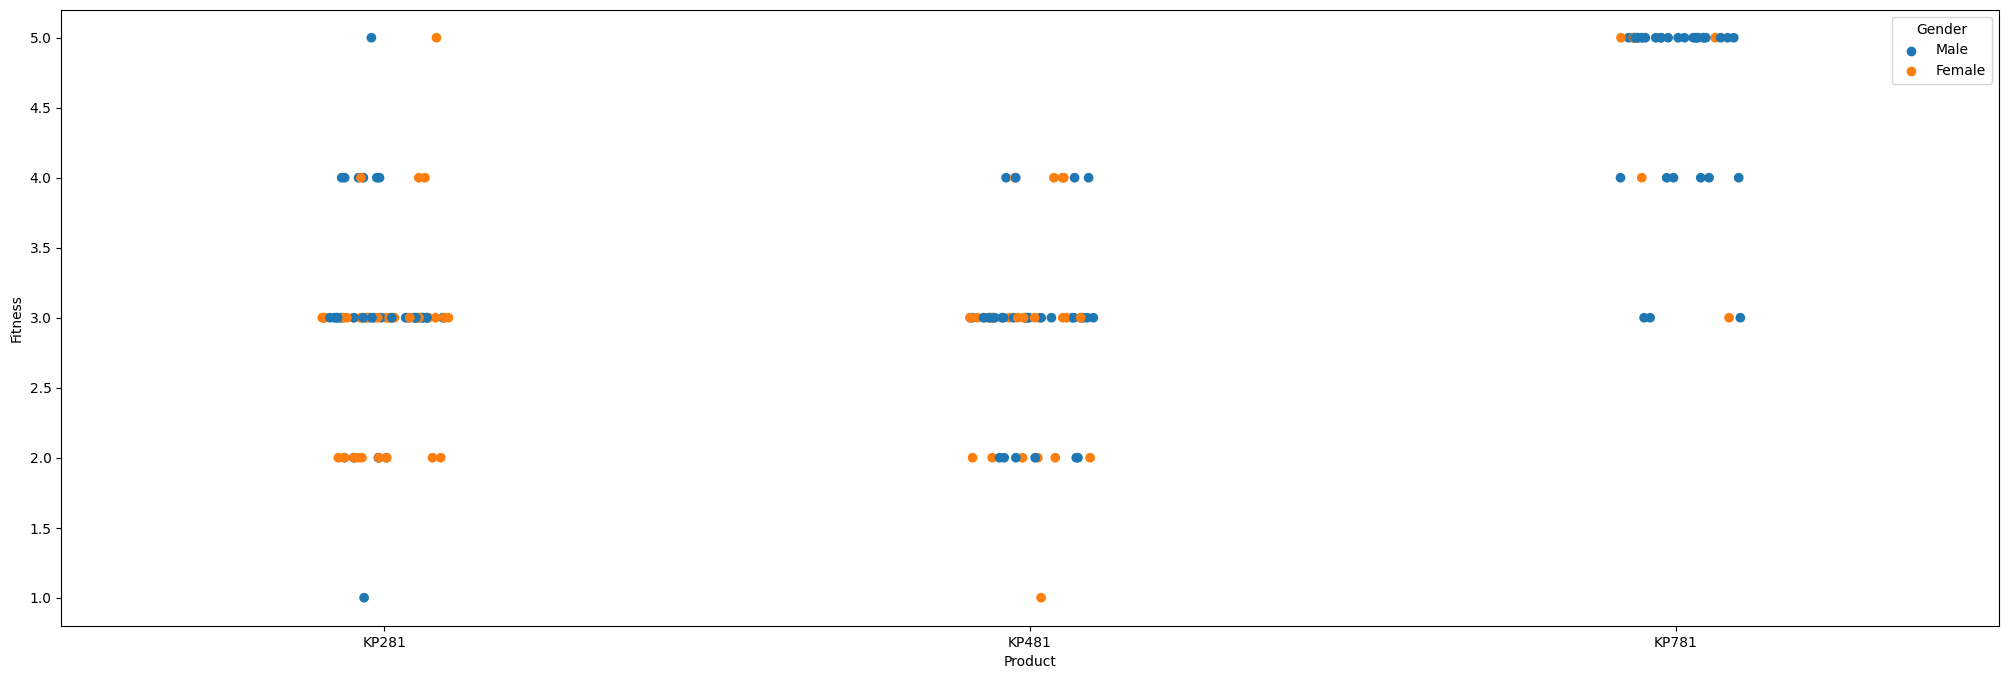

In [19]:
plt.figure(figsize = (25, 8))
sns.stripplot(x="Product",y="Fitness",hue="Gender",data=df,s=7)
plt.show()

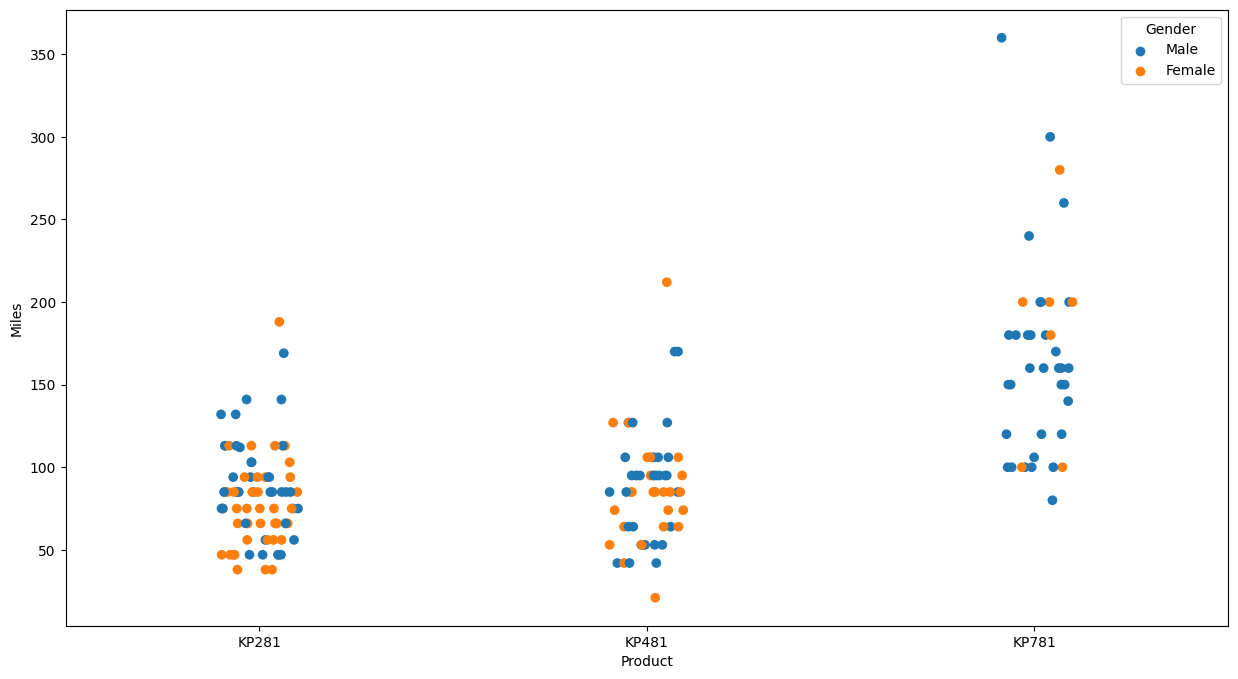

In [20]:
plt.figure(figsize = (15, 8))
sns.stripplot(x="Product",y="Miles",hue="Gender",data=df,s=7)
plt.show()

Conclusion: KP781 is mostly used by those fitness level is 5 and their average mile > 100

In [21]:
kp281=pd.DataFrame(df.loc[df["Product"]=="KP281"])
kp481=pd.DataFrame(df.loc[df["Product"]=="KP481"])
kp781=pd.DataFrame(df.loc[df["Product"]=="KP781"])

In [22]:
# Calculated Probability for product
probability_kp281=df.loc[df["Product"]=="KP281"].count()/df.count()
probability_kp481=df.loc[df["Product"]=="KP481"].count()/df.count()
probability_kp781=df.loc[df["Product"]=="KP781"].count()/df.count()
probability_kp281["Product"],probability_kp481["Product"],probability_kp781["Product"]


(0.4444444444444444, 0.3333333333333333, 0.2222222222222222)

Probability(KP281)=0.44
Probability(KP481)=0.33
Probability(KP781)=0.22

In [23]:
#portion/Probability of Women have brought KP781 Trendmill
kp781_female=kp781[kp781['Gender']=="Female"]
Probabillity_female_kp781=kp781_female.count()/df.loc[df["Product"]=="KP781"].count()
Probabillity_female_kp781["Product"]

0.175

In [24]:
#portion/Probability of Men have brought KP781 Trendmill
kp781_male=kp781[kp781['Gender']=="Male"]
Probabillity_male_kp781=kp781_male.count()/df.loc[df["Product"]=="KP781"].count()
Probabillity_male_kp781["Product"]

0.825

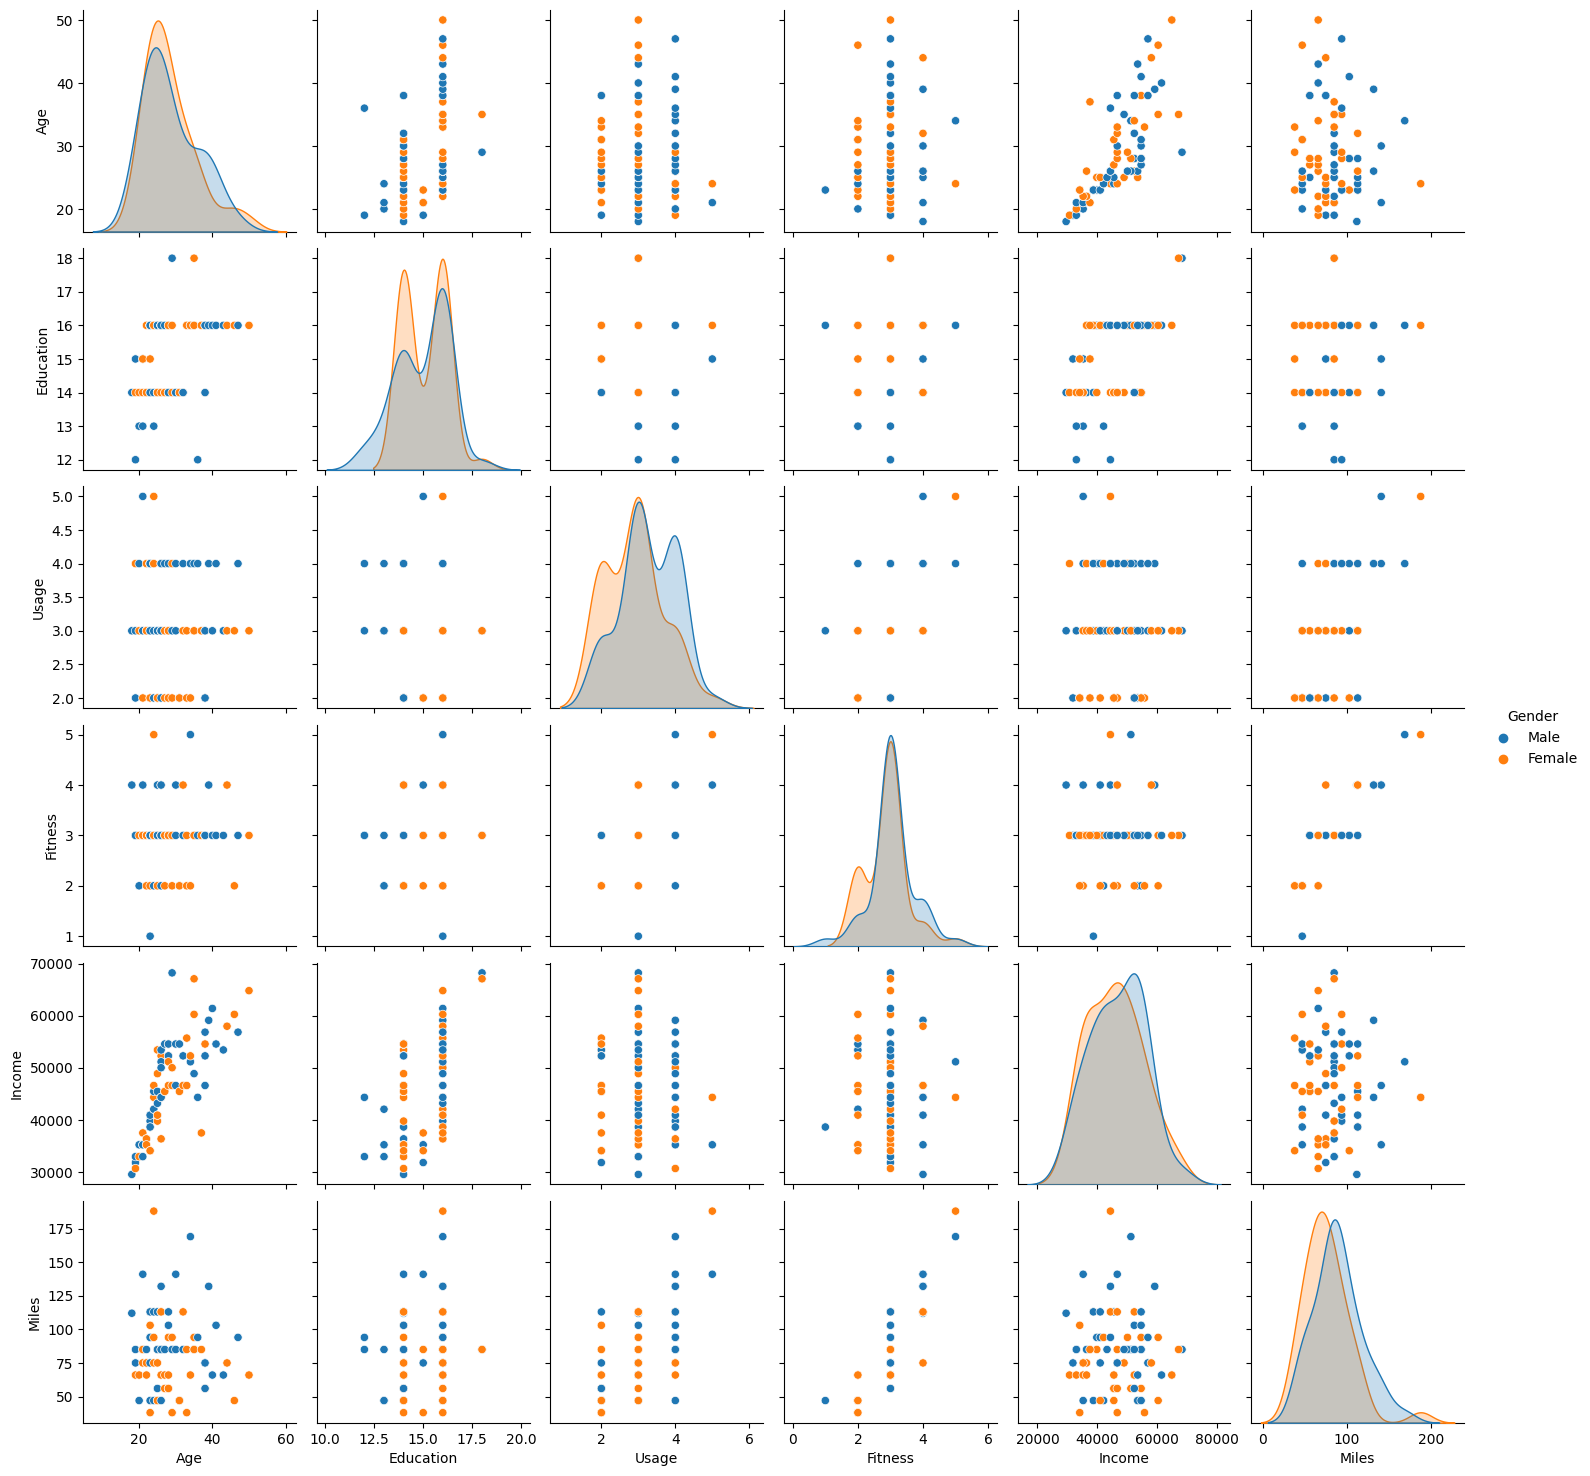

In [29]:
sns.pairplot(data =kp281, hue = "Gender")

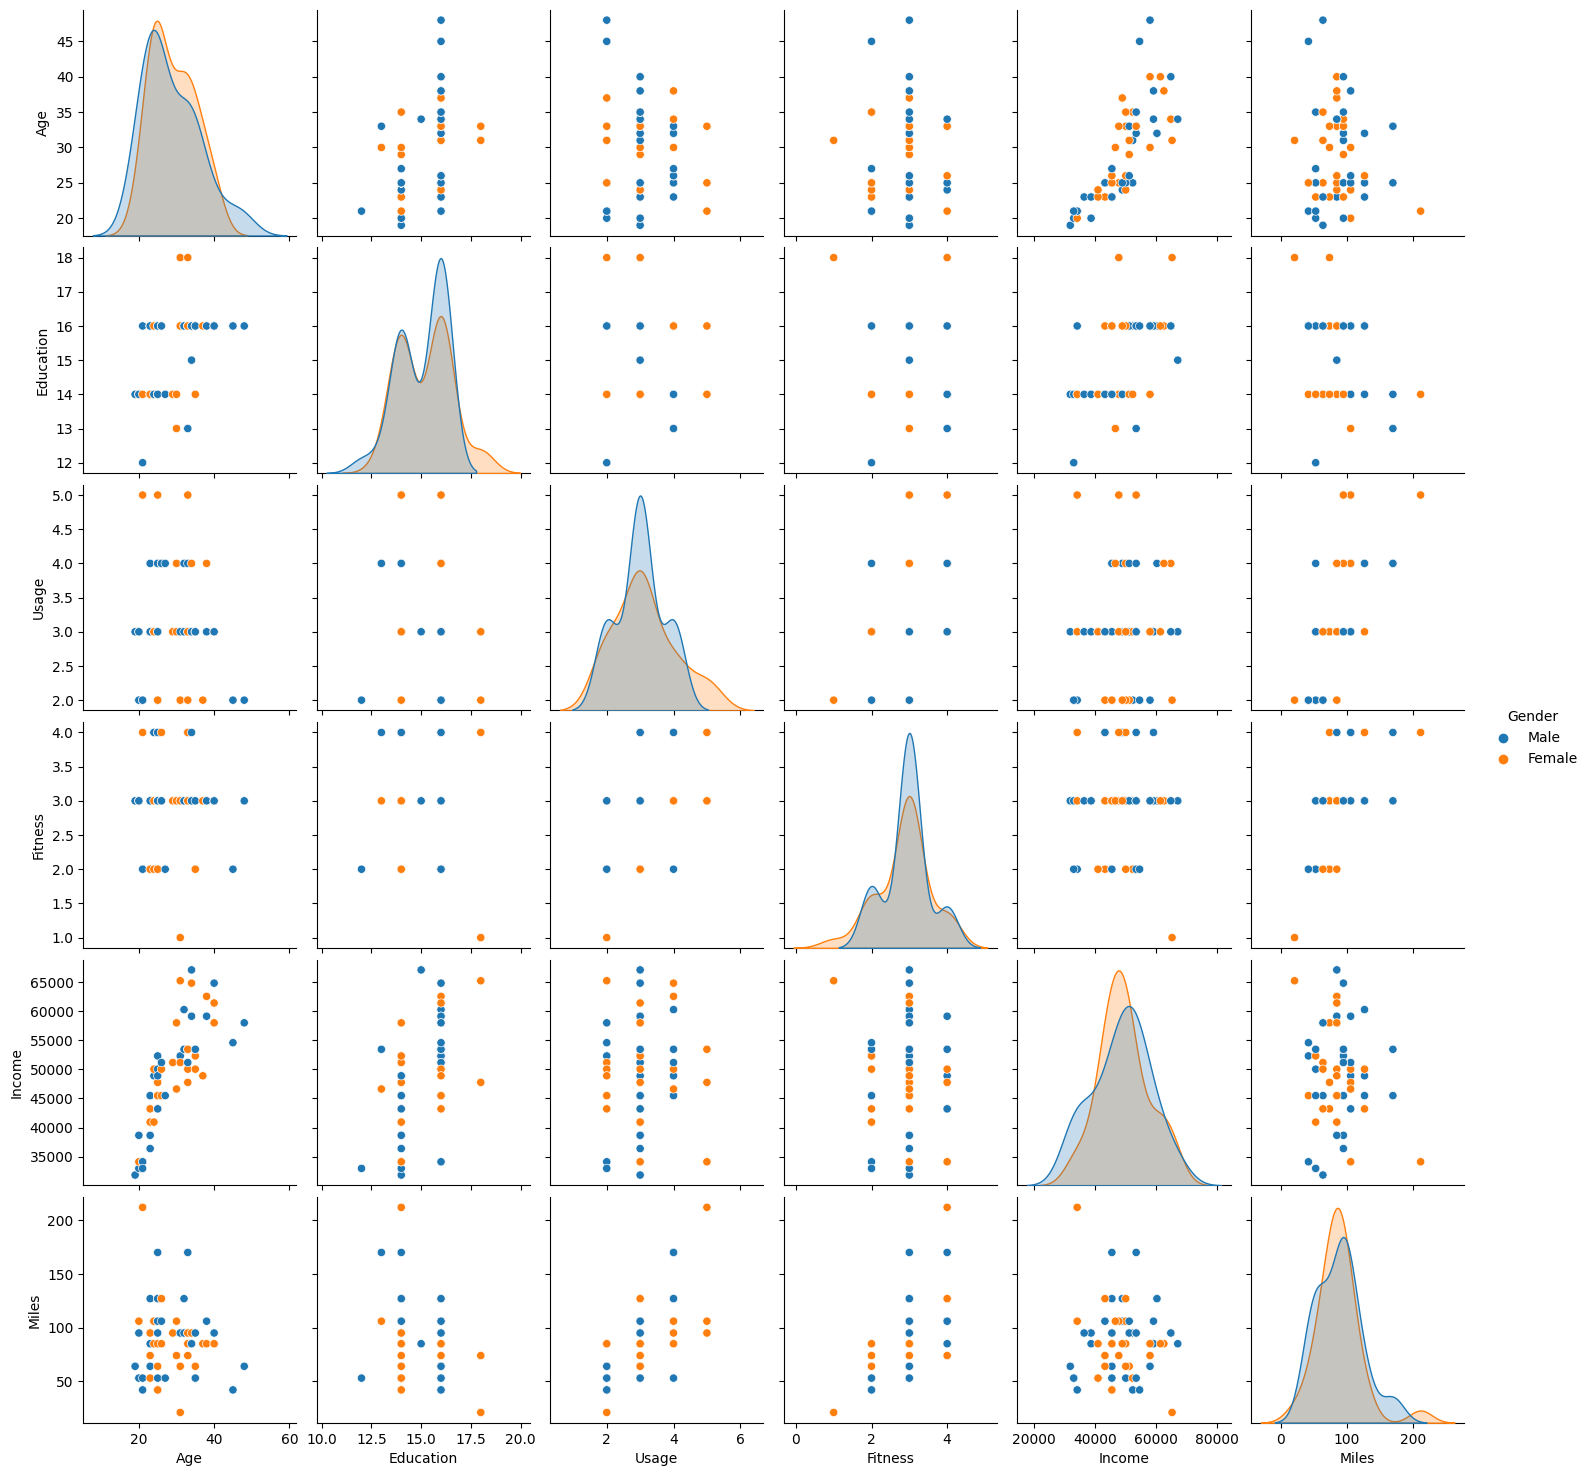

In [30]:
sns.pairplot(data =kp481, hue = "Gender")

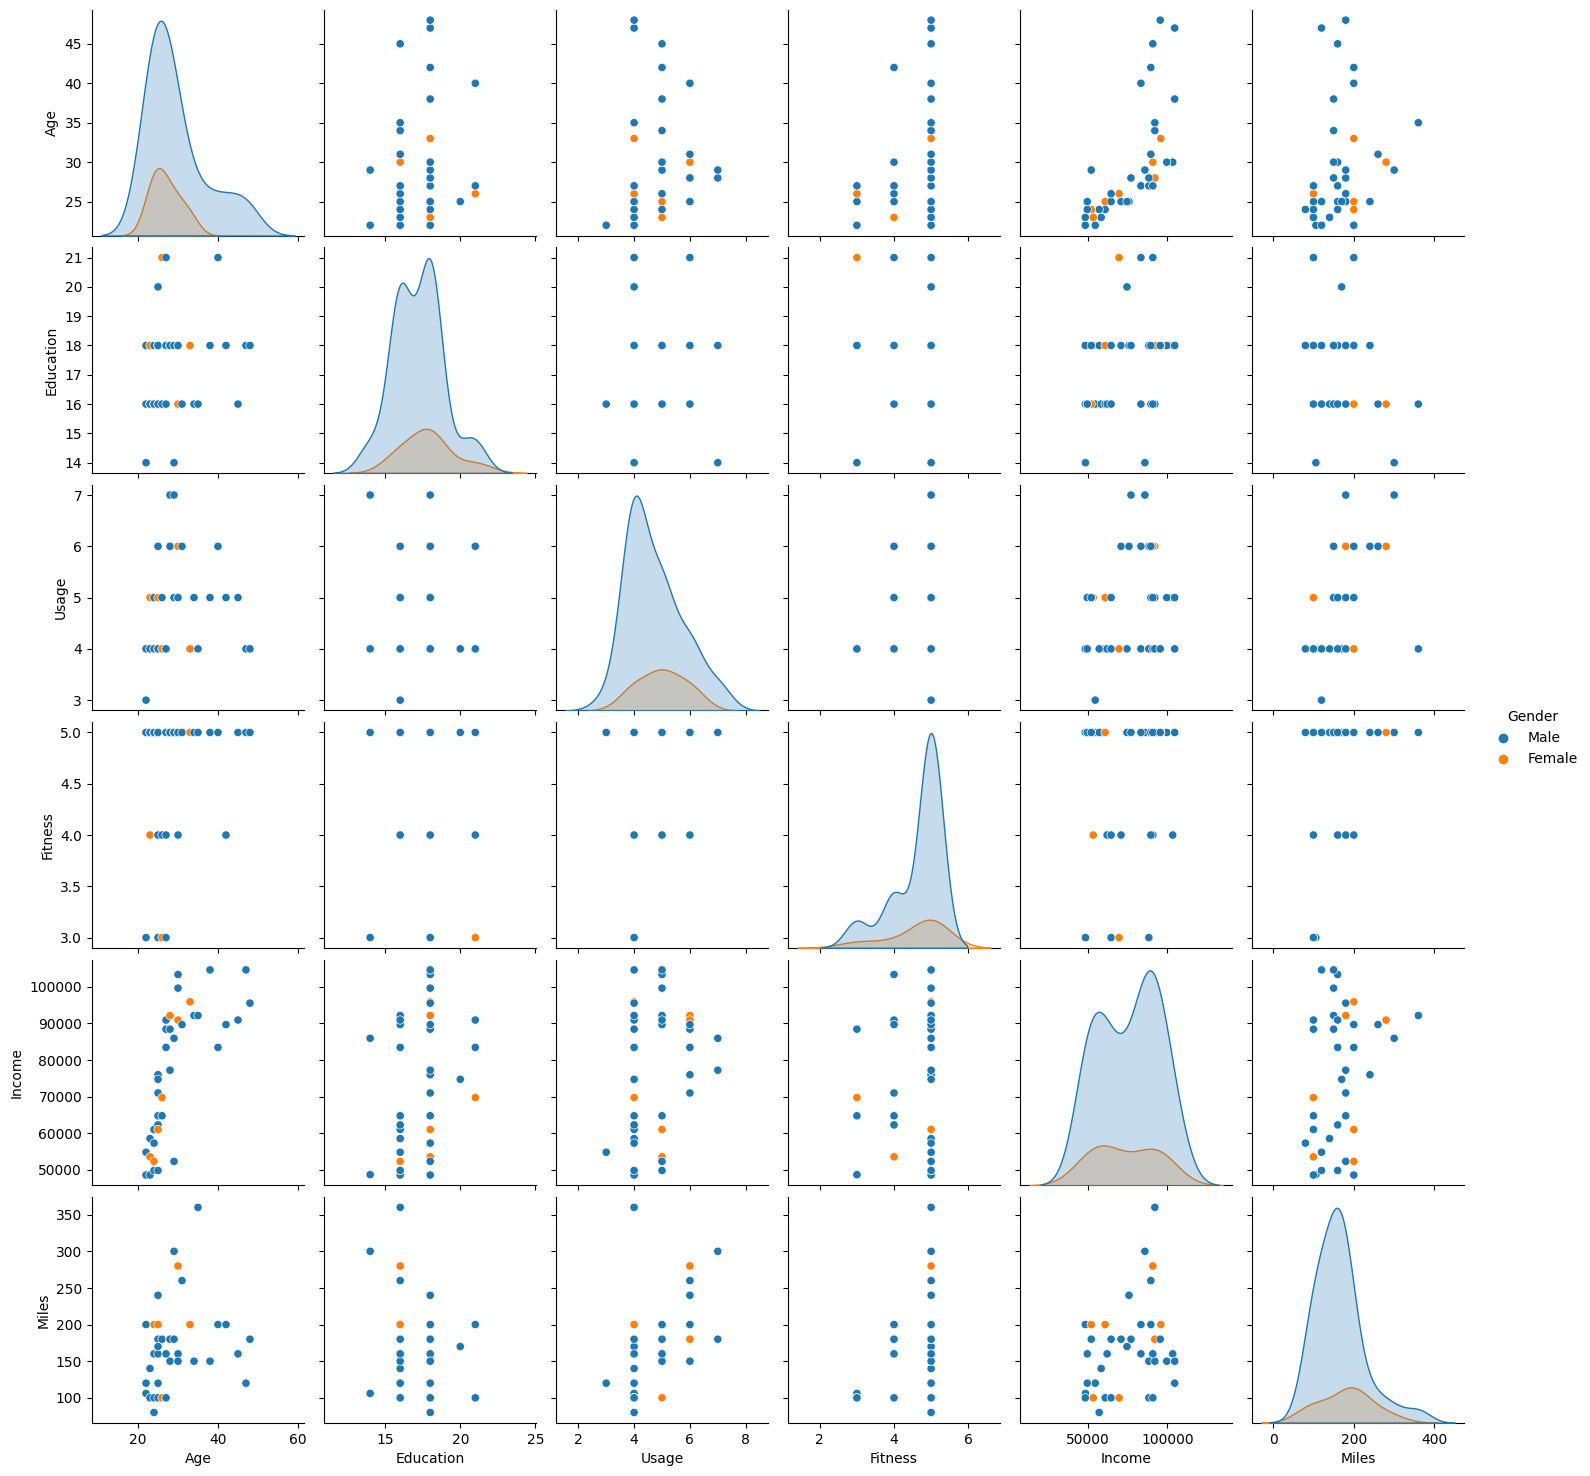

In [31]:
sns.pairplot(data =kp781, hue = "Gender")

Conclusion: Probibilty of male are more in KP781 model

In [ ]:
In

Action Items:
1. KP781 should be marked as for professionals where as KP281 for beginner and KP481 for intermediate fitness level
2. KP281 is mostly used by Educationa 14year for daily commute so student discount will help to get populatiry amougs education group amongs age 22-25years.
